This code reads 'current_datetime' from 'initial_parameters.py'. Further, it loads data from 'results/current_datetime' from simulations done before and creates results represented as plots. This code is called from 'main_code.py' to obtain results automatically.

# Import parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import csv
import os

#load parameters
import initial_parameters

Monomers = initial_parameters.Monomers
gamma = initial_parameters.gamma
Bonds = initial_parameters.Bonds
Kuhn_length_b = initial_parameters.Kuhn_length_b
tau_rouse_theory = initial_parameters.tau_rouse_theory
kT = initial_parameters.kT

In [2]:
#make path to 'results/current_datetime' to save all analysis
path_results = "results/"+str(initial_parameters.current_datetime)+"/"

In [3]:
#create lists for quantities for graphical representation (plots)
list_of_times = []
list_of_sq_end_to_end_distances = []
list_of_sq_distance_of_cm = []
list_of_auto_corr_ee_vector = []

#set simulation id to 0
simulation_id = 0

#fill arrays first time with data
calculated_quantities = open(path_results+'quantities_of_simulation_'+str(simulation_id)+'.dat','r')
lines = csv.reader(calculated_quantities, delimiter='	')

#skip the header
next(lines)

for line in lines:

    #time has to be multiplied by dt, otherwise it is number of timesteps
    list_of_times.append(float(line[0])*initial_parameters.dt)
    list_of_sq_end_to_end_distances.append(float(line[1]))
    list_of_sq_distance_of_cm.append(float(line[2]))
    list_of_auto_corr_ee_vector.append(float(line[3]))


#close the file
calculated_quantities.close()

#increase simulation_id
simulation_id += 1

#fill arrays with data from other simulations
while os.path.isfile(path_results+"quantities_of_simulation_"+str(simulation_id)+".dat") and simulation_id<6:
    
    calculated_quantities = open(path_results+'quantities_of_simulation_'+str(simulation_id)+'.dat','r')
    lines = csv.reader(calculated_quantities, delimiter='	')

    #skip the header
    next(lines)

    #set array index
    array_index = 0
    
    for line in lines:

            #time is already written into array (stays the same)
            list_of_sq_end_to_end_distances[array_index] += float(line[1])
            list_of_sq_distance_of_cm[array_index] += float(line[2])
            list_of_auto_corr_ee_vector[array_index] += float(line[3])
                                                           
            #increase array index
            array_index += 1


    #close the file
    calculated_quantities.close()
                                                           
    #increase simulation_id
    simulation_id += 1
    
#calculate number of simulations
number_of_simulations = simulation_id

#divide (average) quantities arrays by number_of_simulations
list_of_sq_end_to_end_distances =np.array(list_of_sq_end_to_end_distances)/number_of_simulations
list_of_sq_distance_of_cm = np.array(list_of_sq_distance_of_cm)/number_of_simulations
list_of_auto_corr_ee_vector = np.array(list_of_auto_corr_ee_vector)/number_of_simulations



In [4]:
#open existing file (where initial parameters are saved) to add results
results_dat = open(path_results+'results.dat', 'a')

#results are added from following cells
results_dat.write("\n\n"+"-------"
                    "results:\n\n")

19

In [5]:
#set plot parameters

#change figure size
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 9
figure_size[1] = 6
plt.rcParams['figure.figsize'] = figure_size

#set line width
plt.rcParams['lines.linewidth'] = 4

#set label size in the plots
plt.rcParams.update({'font.size': 18})

mean for t>=6*tau_Rouse: [180.31172501] +/- [2.08348783]


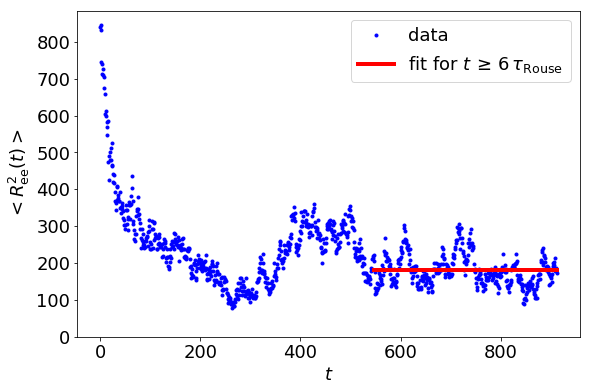

In [6]:
#plot squared end-to-end distance as function of time

#convert array into numpy array and use short names (np.array(np.array(list)) is still np.array)
t = np.array(list_of_times)
y = np.array(list_of_sq_end_to_end_distances)

t_after_6_tau_rouse = t[int(len(y)/10*6):]
y_after_6_tau_rouse = y[int(len(y)/10*6):]

#define fit function; take independent variable as first argument
def func_sq_end_to_end_distance(t_after_6_tau_rouse, const):
    return const + t_after_6_tau_rouse*0

#fit the curve using function, t-values and y-values; return: optimal parameters and covariances
popt, pcov = curve_fit(func_sq_end_to_end_distance, t_after_6_tau_rouse, y_after_6_tau_rouse)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#plot the results
plt.plot(t, y, 'b.', label='data')

#plot linear fit
plt.plot(t_after_6_tau_rouse, func_sq_end_to_end_distance(t_after_6_tau_rouse, *popt),
         'r-', label=(r'fit for $t\,\geq\,6\,\tau_{\mathrm{Rouse}}$'))

print ("mean for t>=6*tau_Rouse: "+str(popt)+
       " +/- "+str(perr))

#set y range due to use of log-representation (otherwise y axis starts at extremely small values)
plt.ylim(0, None)

#save the plot
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.ylabel(r'$< R_{\mathrm{ee}}^2(t) >$')
plt.draw()
plt.savefig(path_results+'sq_end_to_end_distance.png')
plt.show()
plt.close()

The plot above shows the change in squared end-to-end distance of the polymer. The theoretical value in quilibrium is proportional to $N^{6/5}\,b^2$ ($N\,=\,$number of bonds, $b\,=\,$statistical lenght (Kuhn lenght)).

[  0.       0.9118   1.8236 ... 909.9764 910.8882 911.8   ] [1.97215226e-31 1.93239004e-01 1.67933864e-01 ... 2.59074442e+02
 2.61981514e+02 2.62466794e+02]


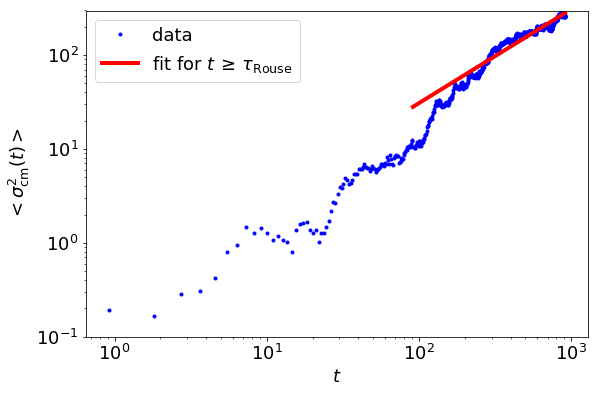

factor_sigma (simultaion)= [0.30779399] +/- [0.0009758]


In [7]:
#plot squared motion of center of mass

#covert arrays into numpy arrays and use short names (use t and y)
t = np.array(list_of_times)
y = np.array(list_of_sq_distance_of_cm)

#find index of time array so that the corresponding time is close to rouse_time
index_tau_rouse = (np.abs(t - tau_rouse_theory)).argmin()

print (t, y)

t_after_tau_rouse = t[index_tau_rouse:]
y_after_tau_rouse = y[index_tau_rouse:]

#define fit function; take independent variable as first argument
def func_motion_of_cm(t_after_tau_rouse, const_cm):
    return const_cm*t_after_tau_rouse

#fit the curve using function, t-values and y-values; return: optimal parameters and covariances
popt, pcov = curve_fit(func_motion_of_cm, t_after_tau_rouse, y_after_tau_rouse)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.plot(t_after_tau_rouse, func_motion_of_cm(t_after_tau_rouse, *popt),
         'r-', label=(r'fit for $t\,\geq\,\tau_{\mathrm{Rouse}}$'))

#save the plot
plt.legend(loc='best')

#set y range due to use of log-representation (otherwise y axis starts at extremely small values)
plt.ylim(0.1, None)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'$< \sigma_{\mathrm{cm}}^2(t) >$')
plt.draw()
plt.savefig(path_results+'sq_distance_of_cm.png')
plt.show()
plt.close()

print ("factor_sigma (simultaion)= "+str(popt)+" +/- "+str(perr))

The plot above shows the motion of center of mass. Represented is the squared distance between current and initial position of center of mass. The red line is the fit.

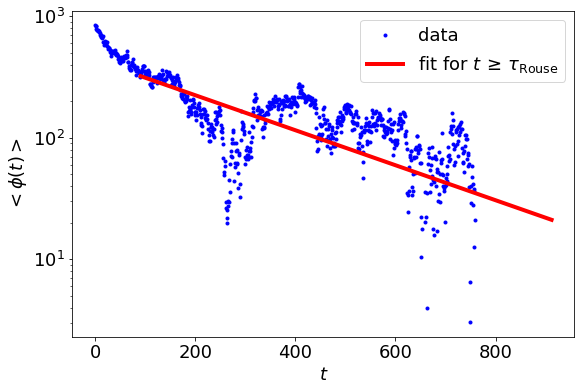

rouse time (simulation) = 301.210759044846 +/- 12.432446368363909


In [8]:
#plot auto-correlation end-to-end vector as function of time

#covert arrays into numpy arrays and use short names (full=all values)
t = np.array(list_of_times)
y = np.array(list_of_auto_corr_ee_vector)

#find index of time array so that the corresponding time is close to rouse_time
index_tau_rouse = (np.abs(t - tau_rouse_theory)).argmin()

#use 'valid' points for fit (after relaxation time)
t_valid = t[index_tau_rouse:]
y_valid = y[index_tau_rouse:]

#define fit function; take independent variable as first argument
def func_auto_corr_ee_vec(t, const_auto_corr, inverse_tau_rouse):
    
    #use instead of 1/tau_rouse inverse_tau_rouse, otherwise fit fails
    return const_auto_corr*np.exp(-t*inverse_tau_rouse)

#fit the curve using function, t-values and y-values
popt, pcov = curve_fit(func_auto_corr_ee_vec, t_valid, y_valid, [0, 0])

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#write theoretical and simulated results into file
results_dat.write("rouse time (simulation) = "+
                  str(1/popt[1])+" +/- "+
                  
                  #Attention: Because of transformation of iverse tau rouse into tau_rouse
                  #the error has to be transformed according to propagation of uncertainty
                  str(math.sqrt((-1/(popt[1]**2)*perr[1])**2))+"\n\n")

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.plot(t_valid, func_auto_corr_ee_vec(t_valid, *popt),
        'r-', label=(r'fit for $t\,\geq\,\tau_{\mathrm{Rouse}}$'))
#plt.plot(t, const_auto_corr*np.exp(-t/tau_rouse_theory),
#'g--', label=('theory; offset depends on initial form of polymer'))

#save plot
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.yscale('log')
plt.ylabel(r'$< \phi(t) >$')
plt.draw()
plt.savefig(path_results+'auto_corr_ee_vector.png')
plt.show()
plt.close()

print ("rouse time (simulation) = "+str(1/popt[1])+
      " +/- "+str(str(math.sqrt((-1/(popt[1]**2)*perr[1])**2))))

The plot above represents the auto-correlation of end-to-end vector. For $t\,\gtrsim\,\tau_{\text{R}}\,=\,\frac{\gamma\,N^2\,b^2}{3\,\pi^2\,k_{\text{B}}\,T}$ (Rouse time), the auto-correlation decays exponentially with $\phi(t)\,\propto\,\exp(-t/\tau_{\text{relax}})$. The red line represents the fit (for $t\,\gtrsim\,\tau_{\text{R}}$) of form: $\text{const.}\,\cdot\,\exp(-t/\tau_{\text{relax}})$.

In [9]:
#close file (where results were saved)
results_dat.close()